In [31]:
import numpy as np
from scipy import optimize
from sim.cartpole import CartPoleEnv
from agents.random_agent import RandomAgent
import csv
from pyswarms.single.global_best import GlobalBestPSO
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
actions = []
with open('memory.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        actions += [float(row[3])]

In [36]:
render = False
def fun(theta):
    env = CartPoleEnv(swingup=True)
    env.masscart = theta[0]
    env.masspole = theta[1]
    env.length = theta[2]
    states = []
    states += [env.reset()]
    if render:
        env.render()
    for x in actions:
        states += [env.step([x])[0]]
        if render:
            env.render()
    env.close()
    return np.array(states)

In [37]:
solution_theta = [1.0, 0.1, 0.5]
solution_states = fun(solution_theta)

/Users/bastian/miniconda3/envs/ml/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/Users/bastian/miniconda3/envs/ml/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [49]:
def loss_(theta):
    states = fun(theta)
    delta_phi = (solution_states[:,[3]] - states[:,[3]]) % (2 * np.pi)
    delta_phi = np.minimum(delta_phi, 2*np.pi - delta_phi)**2
    return (solution_states[:,[0]] - states[:,[0]])**2 + delta_phi

def loss(theta):
    if isinstance(theta[0], float):
        return np.sum(loss_(theta))
    else:
        losses = []
        for t in theta:
            losses += [np.sum(loss(t))]
        return losses

/Users/bastian/miniconda3/envs/ml/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.9590e+05                                    1.74e+13    


/Users/bastian/miniconda3/envs/ml/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


       1             13         2.1601e+05      1.80e+05       2.40e-07       1.69e+13    
       2             16         2.1601e+05      0.00e+00       0.00e+00       1.69e+13    
`xtol` termination condition is satisfied.
Function evaluations 16, initial cost 3.9590e+05, final cost 2.1601e+05, first-order optimality 1.69e+13.
 active_mask: array([0., 0., 0.])
        cost: 216013.68279554407
         fun: array([657.28788639])
        grad: array([1.68554808e+13, 1.67904090e+13, 1.22905294e+13])
         jac: array([[2.56439852e+10, 2.55449846e+10, 1.86988528e+10]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 16
        njev: 2
  optimality: 16855480804312.734
      status: 3
     success: True
           x: array([0.90000017, 0.19999984, 0.39999996])


/Users/bastian/miniconda3/envs/ml/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/Users/bastian/miniconda3/envs/ml/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


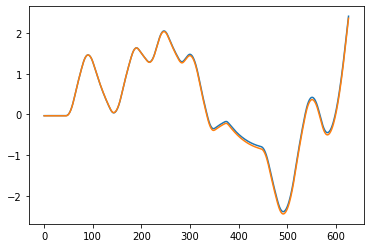

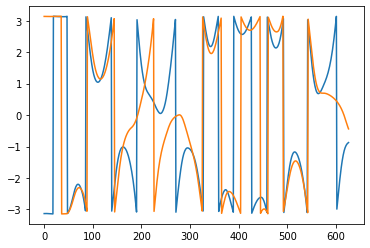

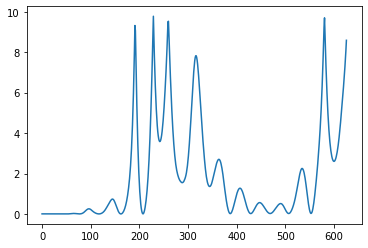

In [52]:
result = optimize.least_squares(loss, guess, verbose=2)
print(result)
states = fun(result.x)
plt.figure()
plt.plot(states[:,0])
plt.plot(solution_states[:,0])
plt.figure()
plt.plot(states[:,3])
plt.plot(solution_states[:,3])
plt.figure()
plt.plot(loss_(result.x))

In [56]:
best_result = None
i = 0
for mc in np.linspace(0.2, 2.0, 10):
    for mp in np.linspace(0.05, 0.5, 10):
        for l in np.linspace(0.1, 1.0, 10):
            guess = [mc, mp, l]
            result = optimize.least_squares(loss, guess)
            if best_result == None or result.cost < best_result.cost:
                best_result = result
            i += 1
print("i: {}\nResult: {}\nLoss: {}\nReason: {}".format(i, best_result.x, best_result.cost, best_result.message))

/Users/bastian/miniconda3/envs/ml/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/Users/bastian/miniconda3/envs/ml/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/Users/bastian/Development/master/cartpole_rl/sim/cartpole.py:137: RuntimeWarning: overflow encountered in double_scalars
  nc_sign = np.sign(nc * x_dot)
/Users/bastian/Development/master/cartpole_rl/sim/cartpole.py:118: RuntimeWarning: overflow encountered in double_scalars
  a = Tm / self.radius + self.polemass_length * theta_dot**2 * sintheta
/Users/bastian/Development/master/cartpole_rl/sim/cartpole.py:119: Runtim

KeyboardInterrupt: 

In [58]:
bounds = ([0.7, 0.05, 0.3], [1.5, 0.2, 0.7])
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=10, dimensions=3, options=options, bounds=bounds)
cost, pos = optimizer.optimize(loss, 1000)

2020-03-13 12:52:58,064 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=46.2
2020-03-13 12:58:43,069 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 46.169953918788615, best pos: [1.34490701 0.09430858 0.59100829]


In [55]:
print(solution_theta, pos)

[1.0, 0.1, 0.5] [1.05484392 0.09228272 0.50247783]


In [57]:
optimize.least_squares(loss, pos)

 active_mask: array([0., 0., 0.])
        cost: 97555.67035775004
         fun: array([441.71409386])
        grad: array([2.05076354e+10, 2.42606875e+13, 1.05182095e+13])
         jac: array([[4.64273964e+07, 5.49239607e+10, 2.38122569e+10]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 16
        njev: 1
  optimality: 24260687549400.113
      status: 3
     success: True
           x: array([1.05484392, 0.09228272, 0.50247783])